In [1]:
import numpy as np

In [2]:
with open('Korean_movie_reviews_2016.txt', encoding='utf-8') as f:
    docs = [doc.strip().split('\t') for doc in f]
    docs = [(doc[0], int(doc[1])) for doc in docs if len(doc) == 2]
    texts, labels = zip(*docs)

## Word2vec 수행하기

In [3]:
docs_words = [ doc.strip().split() for doc in texts]

In [4]:
docs_words[:3]

[['부산', '행', '때문', '너무', '기대하고', '봤'],
 ['한국', '좀비', '영화', '어색하지', '않게', '만들어졌', '놀랍'],
 ['조금', '전', '보고', '왔', '지루하다', '언제', '끝나', '이', '생각', '드']]

In [5]:
from gensim.models import Word2Vec

In [6]:
w2v_model = Word2Vec(docs_words, window=3, min_count=3, vector_size=100)

In [7]:
w2v_model.wv['이정재']

array([-0.09293138,  0.8645569 ,  0.537928  ,  0.31018257, -0.50842637,
       -0.95554674, -0.13401055,  0.8992337 , -0.15484077, -0.53973913,
        0.12098052, -0.44180924,  0.4986594 , -0.47921994,  0.30702618,
       -0.14294077,  0.04060039, -0.30811942, -0.059475  , -0.98509264,
        0.0033306 ,  0.2744541 ,  0.44653714, -0.9695546 , -0.10948884,
        0.7166989 , -0.7975469 ,  0.7120047 ,  0.8946845 ,  0.5628367 ,
       -0.2714264 ,  0.8353561 , -0.4171017 ,  0.5381793 ,  0.12861249,
        0.6848871 ,  0.15077475,  0.20239253, -0.47829697, -0.17184384,
        1.1540768 ,  0.03627096, -0.06032019, -0.03305564,  0.61826855,
       -0.8077087 , -0.16032818,  0.2502527 ,  0.46410316,  0.16910395,
       -0.27073452,  0.03904056, -0.11910862,  0.18718709, -0.82537496,
        0.25514662,  0.15789615, -0.01239512,  0.79599494, -0.38458875,
       -0.65375674, -0.0716465 ,  0.26054204, -0.02187217, -0.4714394 ,
       -0.02642862, -0.8820577 , -0.5981788 , -0.7111333 , -0.01

## 각 문서를 word vector를 이용해서 표현

각 문서는 20x100 의 형태로 표현되어야 함.

In [8]:
words_list = [doc.strip().split() for doc in texts]
# 각 문서를 단어들의 리스트 형태로 표현

In [9]:
total_words = []
for words in words_list:
    total_words.extend(words)

In [10]:
from collections import Counter
c = Counter(total_words)

In [11]:
max_features = 10000
common_words = [ word for word, count in c.most_common(max_features)]
# 빈도를 기준으로 상위 10000개의 단어들만 선택

In [12]:
words_dic ={}
# 각 단어에 대해서 index 생성하기
for index, word in enumerate(common_words):
    words_dic[word]=index+1
    # 각 단어의 index는 1부터 시작
    # 0은 패딩을 위해 사용하지 않음

In [13]:
id2word = {}
for word in words_dic:
    id2word[words_dic[word]]=word

In [15]:
len(id2word)

10000

In [16]:
id2word

{1: '영화',
 2: '너무',
 3: '봤',
 4: '좋',
 5: '진짜',
 6: '정말',
 7: '보고',
 8: '연기',
 9: '평점',
 10: '스토리',
 11: '배우',
 12: '이',
 13: '점',
 14: '보는',
 15: '감동',
 16: '했',
 17: '시간',
 18: '돈',
 19: '사람',
 20: '그냥',
 21: '본',
 22: '더',
 23: '입니',
 24: '였',
 25: '것',
 26: '이런',
 27: '봐',
 28: '재미',
 29: '하는',
 30: '최고',
 31: '아니',
 32: '내용',
 33: '재미없',
 34: '왜',
 35: '볼',
 36: '감독',
 37: '생각',
 38: '없는',
 39: '말',
 40: '알',
 41: '잘',
 42: '노잼',
 43: '아깝',
 44: '내',
 45: '처음',
 46: '최악',
 47: '할',
 48: '기대',
 49: '없고',
 50: '좀',
 51: '나',
 52: '좀비',
 53: '정도',
 54: '꼭',
 55: '거',
 56: '재밌게',
 57: '그',
 58: '있는',
 59: '알바',
 60: '모르',
 61: '수',
 62: '역시',
 63: '같은',
 64: '하나',
 65: '잼',
 66: '때',
 67: '보면',
 68: '뭐',
 69: '느낌',
 70: '별로',
 71: '완전',
 72: '임',
 73: '마지막',
 74: '재밌었',
 75: '장면',
 76: '개',
 77: '아이',
 78: '없다',
 79: '한',
 80: '들',
 81: '없',
 82: '분',
 83: '안',
 84: '와',
 85: '중간',
 86: '넘',
 87: '재밌어',
 88: '또',
 89: '보세',
 90: '끝',
 91: '이건',
 92: '보다',
 93: '다시',
 94: '걸',
 95: '듯'

In [26]:
# 각 문서를 상위 10000개 단어들에 대해서 index 번호로 표현하기
filtered_indexed_words = []
for review in words_list:
    indexed_words=[]
    for word in review:
        try:
            indexed_words.append(words_dic[word])
        except:
            pass
    filtered_indexed_words.append(indexed_words)

In [15]:
max_len = 20
# 각 영화평의 길이를 20으로 통일 

In [16]:
from tensorflow.keras.preprocessing import sequence
X = sequence.pad_sequences(filtered_indexed_words, maxlen=max_len)

In [17]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 204, 249, 121,   2, 345,   3])

0이면 모두 0으로 채움

In [18]:
zeros_vector = np.zeros(100,dtype="float32")

In [19]:
zeros_vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [20]:
X_vectors = []
for doc in X:
    doc_vectors = []
    for token_id in doc:
        if token_id == 0: # token_ID == 0 이면 제로 벡터 사용
            doc_vectors.append(zeros_vector)
        else:
            word = id2word[token_id] #token_id를 이용해서 단어 추출
            vector = w2v_model.wv[word] # 단어의 word2vec 벡터 추출
            doc_vectors.append(vector)
    X_vectors.append(np.array(doc_vectors))

In [21]:
X_vectors = np.array(X_vectors)

In [22]:
X_vectors.shape

(165384, 20, 100)

In [30]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow import reshape, shape

In [27]:
input_shape = (20,100)

In [100]:
input = layers.Input(shape=input_shape)
x=layers.Conv1D(32, 5, activation='relu', padding='same')(input)
x=layers.MaxPool1D(2, padding='same')(x)
fc = layers.Flatten()(x)
code = layers.Dense(64, activation="linear")(fc)

decoded = layers.Dense(320, activation="relu")(code)
x = reshape(decoded, (shape(decoded)[0], 10, 32))
x = layers.Conv1DTranspose(32, 2, strides=2, activation="relu")(x)
output = layers.TimeDistributed(layers.Dense(100))(x)
autoencoder = models.Model(input, output)

In [101]:
autoencoder.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 20, 100)]    0           []                               
                                                                                                  
 conv1d_19 (Conv1D)             (None, 20, 32)       16032       ['input_16[0][0]']               
                                                                                                  
 max_pooling1d_19 (MaxPooling1D  (None, 10, 32)      0           ['conv1d_19[0][0]']              
 )                                                                                                
                                                                                                  
 flatten_15 (Flatten)           (None, 320)          0           ['max_pooling1d_19[0][0]']

In [102]:
from tensorflow.keras import optimizers
autoencoder.compile(optimizer=optimizers.Adam(0.001), loss='mse')

In [103]:
history = autoencoder.fit(X_vectors, X_vectors, epochs=50, batch_size=256, validation_split=0.1)

Epoch 1/15
582/582 [==============================] - 10s 16ms/step - loss: 0.2305 - val_loss: 0.1993
Epoch 2/15
582/582 [==============================] - 9s 15ms/step - loss: 0.1886 - val_loss: 0.1840
Epoch 3/15
582/582 [==============================] - 9s 15ms/step - loss: 0.1803 - val_loss: 0.1791
Epoch 4/15
582/582 [==============================] - 9s 15ms/step - loss: 0.1757 - val_loss: 0.1754
Epoch 5/15
582/582 [==============================] - 9s 15ms/step - loss: 0.1729 - val_loss: 0.1732
Epoch 6/15
582/582 [==============================] - 9s 15ms/step - loss: 0.1710 - val_loss: 0.1717
Epoch 7/15
582/582 [==============================] - 9s 15ms/step - loss: 0.1695 - val_loss: 0.1703
Epoch 8/15
582/582 [==============================] - 9s 15ms/step - loss: 0.1682 - val_loss: 0.1690
Epoch 9/15
582/582 [==============================] - 9s 15ms/step - loss: 0.1671 - val_loss: 0.1680
Epoch 10/15
582/582 [==============================] - 9s 15ms/step - loss: 0.1661 - val_l

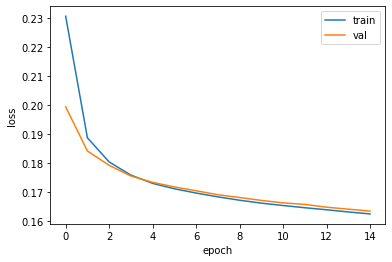

In [104]:
# import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## 인코더 부분을 사용한 감성분석

In [ ]:
# 인코더 모형 생성
encoder = models.Model(inputs=input, outputs=code)

In [105]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_vectors, labels, test_size=0.1, random_state=0)

In [107]:
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)

In [108]:
X_train_encode.shape

(148845, 64)

In [109]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation = 'relu', input_shape=(X_train_encode.shape[1],)))
model1.add(layers.Dense(2, activation = 'softmax'))
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 64)                4160      
                                                                 
 dense_56 (Dense)            (None, 2)                 130       
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________


In [110]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [111]:
model1.compile(optimizer=optimizers.RMSprop(0.0001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [116]:
history = model1.fit(X_train_encode, y_train_one_hot, epochs=20, batch_size=128, 
                     validation_split=0.2)

Epoch 1/20
931/931 [==============================] - 1s 2ms/step - loss: 0.3638 - accuracy: 0.8362 - val_loss: 0.3932 - val_accuracy: 0.8237
Epoch 2/20
931/931 [==============================] - 1s 2ms/step - loss: 0.3635 - accuracy: 0.8365 - val_loss: 0.3928 - val_accuracy: 0.8234
Epoch 3/20
931/931 [==============================] - 1s 1ms/step - loss: 0.3633 - accuracy: 0.8368 - val_loss: 0.3940 - val_accuracy: 0.8230
Epoch 4/20
931/931 [==============================] - 1s 1ms/step - loss: 0.3632 - accuracy: 0.8368 - val_loss: 0.3932 - val_accuracy: 0.8232
Epoch 5/20
931/931 [==============================] - 1s 2ms/step - loss: 0.3629 - accuracy: 0.8368 - val_loss: 0.3929 - val_accuracy: 0.8231
Epoch 6/20
931/931 [==============================] - 1s 1ms/step - loss: 0.3626 - accuracy: 0.8369 - val_loss: 0.3931 - val_accuracy: 0.8235
Epoch 7/20
931/931 [==============================] - 1s 2ms/step - loss: 0.3624 - accuracy: 0.8372 - val_loss: 0.3927 - val_accuracy: 0.8245
Epoch 

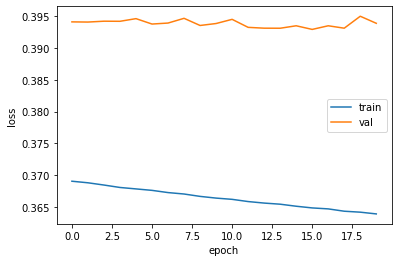

In [114]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [115]:
model1.evaluate(X_test_encode, y_test_one_hot)

517/517 [==============================] - 0s 812us/step - loss: 0.3837 - accuracy: 0.8315


[0.3837488889694214, 0.8314892053604126]